# ValueMonitor - Use an existing topic model

This page is a visualisation of the ValueMonitor prototype. In case you would like to use the notebook, click on the icon ‘**Run in Google Colab**’ hereunder:

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tristandewildt/ValueMonitor_Workshops/blob/main/ValueMonitor_Workshop_use_existing_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tristandewildt/ValueMonitor_Workshops/blob/main/ValueMonitor_Workshop_use_existing_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## Table of content:
* [1. Import dataset and packages](#import_dataset_and_packages)
* [2. Gap assessment](#gap_assessment)
* [3. Impact assessment](#impact_assessment)
* [4. Values in different realms](#values_in_different_realms)

## 1. Import dataset and packages  <a name="import_dataset_and_packages"></a>

In this step, the dataset and relavant python packages are imported

In [32]:
''' Packages'''

!pip install corextopic
!pip install joblib
!pip install tabulate
!pip install simple_colors

import os, sys, importlib
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import pickle

''' Source code'''

user = "tristandewildt"
repo = "ValueMonitor_Prototype"
src_dir = "code"
pyfile_1 = "make_topic_model.py"
pyfile_2 = "create_visualisation.py"

if os.path.isdir(repo):
    !rm -rf {repo}
    
!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

make_topic_model = importlib.import_module(pyfile_1.rstrip(".py"))
create_visualisation = importlib.import_module(pyfile_2.rstrip(".py"))

from make_topic_model import *
from create_visualisation import *

''' Datasets'''

!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=12ZyryF8MbMYKuhIBEhUUvnvx43_cna56' -O dataset_ValueMonitor_prototype
!wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=144rMxUYCfj-8GjOQNRz7LzoOAPMdMcnb' -O topics_weights
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12_EoLJLL_wjc8n1Az3wudsvaTgA605aK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12_EoLJLL_wjc8n1Az3wudsvaTgA605aK" -O combined_STOA_technologies_saved_topic_model && rm -rf /tmp/cookies.txt

#https://drive.google.com/file/d/144rMxUYCfj-8GjOQNRz7LzoOAPMdMcnb/view?usp=sharing

with open('dataset_ValueMonitor_prototype', "rb") as fh:
    df = pickle.load(fh)
with open('topics_weights', "rb") as fh:
    topics_weights = pickle.load(fh)
with open('combined_STOA_technologies_saved_topic_model', "rb") as fh:
    combined_STOA_technologies_saved_topic_model = pickle.load(fh)

results_import = import_topic_model(combined_STOA_technologies_saved_topic_model, df)
if len(results_import):
    df_with_topics = results_import[0]
    topics = results_import[1]
    dict_anchor_words = results_import[2]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ValueMonitor_Prototype'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 145 (delta 39), reused 74 (delta 34), pack-reused 63
Receiving objects: 100% (145/145), 16.69 MiB | 4.55 MiB/s, done.
Resolving deltas: 100% (75/75), done.
dataset_ValueMonito 100%[===================>]  43.65M   268MB/s    in 0.2s    
topics_weights      100%[===================>] 114.06K  --.-KB/s    in 0.002s  
--2023-02-10 13:24:50--  https://docs.google.com/uc?export=download&confirm=t&id=12_EoLJLL_wjc8n1A

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## 2. Overview of topics in the model

In [25]:
number_of_words_per_topic = 10
get_topics_func = combined_STOA_technologies_saved_topic_model[0][0].get_topics(n_words=number_of_words_per_topic)

In [29]:
    list_values = []
    words_values = {}
    for key, value in dict_anchor_words.items(): 
        list_values.append(key)
        
    index_values = []
    for i in list_values:
        index_values.append(list_values.index(i))
    dict_topics_weights = {}
    for i, topic_ngrams in enumerate(get_topics_func):
        dict_topic_ngrams = {}
        for ngram in topic_ngrams:
          if ngram[1] > 0:
            dict_topic_ngrams[ngram[0]]= round(ngram[1],3)
        #topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
       
        if i in index_values:
            words_values[list_values[i]] = topic_ngrams
            #print("Topic #{} ({}): {}".format(i, list_values[i], ", ".join(topic_ngrams)))
            dict_topics_weights["Topic #"+str(i)+"# ("+str(list_values[i])+")"] = dict_topic_ngrams
        else:
            #words_values[i] = topic_ngrams
            #print("Topic #{}: {}".format(i, ", ".join(topic_ngrams)))
            dict_topics_weights["Topic #"+str(i)+"#"] = dict_topic_ngrams
        words_values[i] = topic_ngrams

In [31]:
with open('topics_weights', 'wb') as handle:
    pickle.dump(dict_topics_weights, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
for topic, words in dict_topics_weights.items():
  print(str(topic)+": "+str(words))

Topic #0# (Justice and Fairness): {'justice': 0.722, 'fair': 0.558, 'fairness': 0.237, 'equality': 0.133, 'unfair': 0.13, 'unequal': 0.057, 'equitable': 0.045, 'unjust': 0.036, 'criminal justice': 0.035, 'social justice': 0.025}
Topic #1# (Privacy): {'privacy': 2.01, 'personal data': 0.215, 'data privacy': 0.2, 'privacy protection': 0.092, 'privacy concerns': 0.086, 'privacy data': 0.071, 'user privacy': 0.064, 'privacy issues': 0.048, 'security privacy': 0.045, 'privacy security': 0.042}
Topic #2# (Cyber-security): {'security': 2.037, 'attacks': 0.349, 'cybersecurity': 0.19, 'cyber': 0.086, 'threats': 0.036, 'malicious': 0.032, 'encryption': 0.022, 'social security': 0.018, 'safety security': 0.016, 'security issues': 0.015}
Topic #3# (Environmnental Sustainability): {'environmental': 0.756, 'sustainable': 0.428, 'sustainability': 0.262, 'renewable': 0.121, 'sustainable development': 0.062, 'durable': 0.047, 'renewable energy': 0.032, 'carbon': 0.026, 'emissions': 0.023, 'environmenta

In [23]:
topics_weights

{0: 'justice, fair, fairness, equality, unfair, unequal, equitable, unjust, criminal justice, social justice, justice system, department justice, gender equality, free fair, egalitarianism, distributive justice, distributive, inequalities, vanity fair, sentencing',
 'Justice and Fairness': 'justice, fair, fairness, equality, unfair, unequal, equitable, unjust, criminal justice, social justice, justice system, department justice, gender equality, free fair, egalitarianism, distributive justice, distributive, inequalities, vanity fair, sentencing',
 1: 'privacy, personal data, data privacy, privacy protection, privacy concerns, privacy data, user privacy, privacy issues, security privacy, privacy security, personal information, privacy preserving, confidentiality, privacy preservation, privacy law, consumer privacy, facebook privacy, privacy information, privacy policies, issues privacy',
 'Privacy': 'privacy, personal data, data privacy, privacy protection, privacy concerns, privacy dat

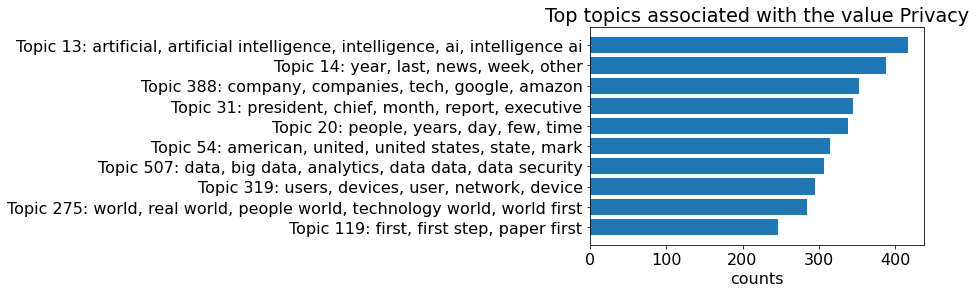

In [38]:
import re

# Bars chart
top_topics_to_show = 10
selected_value = "Privacy"  # 'Environmental Sustainability', 'Safety', 'Economic viability', 'Efficiency', 'Affordability'
topics_to_remove_int = [416
]

'''-----------------------------'''

dict_values = {}
counter = 0
for value, words in dict_anchor_words.items():
  dict_values[value]=counter
  counter = counter + 1

df_to_evaluate = df_with_topics
df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate[dict_values[selected_value]] == 1)]

list_columns_on_topics = list(range(len(dict_anchor_words), len(topics_weights), 1))
list_empty_topics = []
for topic, words in topics_weights.items():
  if len(words)==0:
    topic_int = topic[topic.find('#')+len('#'):topic.rfind(')')]
    list_empty_topics.append(int(topic_int))
list_columns_on_topics = [x for x in list_columns_on_topics if x not in list_empty_topics]
list_columns_on_topics = [x for x in list_columns_on_topics if x not in topics_to_remove_int]
df_to_evaluate = df_to_evaluate[list_columns_on_topics]

count_df_to_evaluate = df_to_evaluate.sum()
count_df_to_evaluate = count_df_to_evaluate.sort_values(ascending=False)
count_df_to_evaluate = count_df_to_evaluate[:top_topics_to_show]

dict_dataset_short = count_df_to_evaluate.to_dict()
dict_dataset_short_names = {}
for topic_int, count in dict_dataset_short.items():
  words_weights = topics_weights["Topic #"+str(topic_int)+"#"]
  list_words_weights = "Topic "+str(topic_int)+": "+", ".join(list(words_weights.keys())[:5])
  dict_dataset_short_names[list_words_weights]=count

plt.barh(list(dict_dataset_short_names.keys()), list(dict_dataset_short_names.values()))
plt.gca().invert_yaxis()
    
plt.rcParams.update({'font.size': 16})
plt.title('Top topics associated with the value '+str(selected_value))
plt.xlabel('counts')
plt.show()


In [40]:
def plot_print_sample_articles_topic(selected_value, selected_topic, show_full_text, size_sample):
    show_extracts = True # True, False
    #show_full_text  = True # True, False
    df_to_evaluate = df_with_topics
    df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate[int(selected_topic)] == 1)]
    print_sample_articles_topic(df_to_evaluate, dict_anchor_words, topics, selected_value, size_sample, window =10, show_extracts, show_full_text)

interact(plot_print_sample_articles_topic, selected_value=[*dict_anchor_words], selected_topic=widgets.Text(), size_sample =(5,50, 5), show_full_text = widgets.Checkbox(value=False))

SyntaxError: ignored

## 3. Values in different realms

ValueMonitor can be used to evaluate which values different societal groups tend to discuss.

In [ ]:
def plot_values_in_different_groups(selected_dataset):
    values_in_different_groups(df_with_topics, dict_anchor_words, selected_dataset)

interact(plot_values_in_different_groups, selected_dataset = ['NEWS', 'ETHICS', 'TECH'])

In [69]:
def plot_print_sample_articles_topic(selected_value, selected_dataset, size_sample):

    show_extracts = True # True, False
    show_full_text  = False # True, False

    '''--------------------------------------------------------------------------''' 

    df_with_topics_selected_technology_dataset = df_with_topics[df_with_topics['dataset'] == selected_dataset]
    print_sample_articles_topic(df_with_topics_selected_technology_dataset, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)
interact(plot_print_sample_articles_topic, selected_value=[*dict_anchor_words], selected_dataset = ["TECH", "NEWS", "ETHICS", ], size_sample =(5,50, 5))

interactive(children=(Dropdown(description='selected_value', options=('Justice and Fairness', 'Privacy', 'Cybe…

<function __main__.plot_print_sample_articles_topic(selected_value, selected_dataset, size_sample)>

## 4. Values over time

The occurence of values can be traced over time.

In [70]:
def plot_create_vis_values_over_time (selected_technology, selected_dataset, resampling, smoothing, max_value_y):

    T0 = "1980-01-01" #YYYY-MM-DD
    T1 = "2023-01-01" #YYYY-MM-DD

    values_to_include_in_visualisation = []
    
    resampling_dict = {"Year": "Y", "Month": "M", "Day": "D"}
    resampling = resampling_dict[resampling]
    df_with_topics_short = df_with_topics.loc[(df_with_topics['date'] >= dateutil.parser.parse(T0)) & (df_with_topics['date'] <= dateutil.parser.parse(T1))]
    df_with_topics_selected_technology = df_with_topics_short[df_with_topics_short[selected_technology] == True]
    df_with_topics_selected_technology_dataset = df_with_topics_selected_technology[df_with_topics_selected_technology['dataset'] == selected_dataset]
    create_vis_values_over_time(df_with_topics_selected_technology_dataset, dict_anchor_words, resampling, values_to_include_in_visualisation, smoothing, max_value_y)  
    
    

interact(plot_create_vis_values_over_time, selected_technology=["AI", "IoT"], selected_dataset = ["TECH", "NEWS", "ETHICS",], smoothing = (0.25,3, 0.25), max_value_y = (5,100, 5), resampling = ["Year", "Month", "Day"])

interactive(children=(Dropdown(description='selected_technology', options=('AI', 'IoT'), value='AI'), Dropdown…

<function __main__.plot_create_vis_values_over_time(selected_technology, selected_dataset, resampling, smoothing, max_value_y)>

In [74]:
list_words = []
#list_words = ['sustainable', 'sustainability', 'sustainable development']

def plot_words_over_time (selected_value, selected_dataset, smoothing, max_value_y, resampling):

    selected_df_with_topics = df_with_topics
    if selected_dataset != "All_datasets":
      selected_df_with_topics = selected_df_with_topics.loc[(selected_df_with_topics["dataset"] == selected_dataset)]
   
    resampling_dict = {"Year": "Y", "Month": "M", "Day": "D"}
    inspect_words_over_time(df_with_topics = selected_df_with_topics, 
                            selected_value = selected_value,
                            dict_anchor_words = dict_anchor_words,
                            topics = topics,
                            list_words = list_words, 
                            resampling = resampling_dict[resampling], 
                            smoothing = smoothing, 
                            max_value_y = max_value_y)

my_interact_manual = interact_manual.options(manual_name="Plot words over time")
my_interact_manual(plot_words_over_time, selected_value=[*dict_anchor_words], selected_dataset=["TECH", "NEWS", "ETHICS", "All_datasets"], smoothing = (0.1,3, 0.25), max_value_y = (5,100, 5), resampling = ["Year", "Month", "Day"])

interactive(children=(Dropdown(description='selected_value', options=('Justice and Fairness', 'Privacy', 'Cybe…

<function __main__.plot_words_over_time(selected_value, selected_dataset, smoothing, max_value_y, resampling)>

In [ ]:
top_topics_to_show = 10
readjust_colors = 11
max_value_y = 100
T0 = "1990"
T1 = "2022"
smoothing = 1
resampling = "Y"
selected_value = "Privacy"  # 'Environmental Sustainability', 'Safety', 'Economic viability', 'Efficiency', 'Affordability'
#selected_domain = "all_domains"   # "power generation", "mobility", "industry", "all_domains"
topics_to_remove_int = [#79, 185, 189, 309, 219, 347, 394, 264, 371, 217, 65, 21, 283, 146, 14, 302, 163, 323

]


df_to_evaluate = df_with_topics
df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate[dict_values[selected_value]] == 1)]
#if selected_domain == "all_domains":
#    df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate[5] == 1) | (df_to_evaluate[6] == 1) | (df_to_evaluate[7] == 1)]
#if selected_domain != "all_domains":
#    df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate[dict_domains[selected_domain]] == 1)]
df_to_evaluate = df_to_evaluate.loc[(df_to_evaluate['date'] >= dateutil.parser.parse(str(T0))) & (df_to_evaluate['date'] <= dateutil.parser.parse(str(T1)))]
df_to_evaluate = df_to_evaluate.set_index('date')  

        
df_with_topics_freq = df_to_evaluate.resample(resampling).size().reset_index(name="count")
df_with_topics_freq = df_with_topics_freq.set_index('date')
      
df_to_evaluate = df_to_evaluate.fillna("")


df_to_evaluate = df_to_evaluate.rename(columns=dict_topics)

df_to_evaluate = df_to_evaluate[list(dict_topics.values())]
print(df_to_evaluate)
topics_to_remove_str = []
for i in topics_to_remove_int:
    topics_to_remove_str.append(dict_topics[i])
for i in list(dict_values.values()):
    topics_to_remove_str.append(dict_topics[i])
topics_to_remove_str.append(selected_value)
df_to_evaluate = df_to_evaluate.drop(columns=topics_to_remove_str)

df_to_evaluate = df_to_evaluate.resample(resampling).sum()
count_df_to_evaluate = df_to_evaluate.sum()
initial_number_topics = len(count_df_to_evaluate)

count_df_to_evaluate = count_df_to_evaluate.sort_values(ascending=False)
count_df_to_evaluate = count_df_to_evaluate[:top_topics_to_show]

percentage_df_to_evaluate = count_df_to_evaluate.divide(count_df_to_evaluate.sum(), fill_value=0)
percentage_df_to_evaluate = percentage_df_to_evaluate * 100
list_topics_above_threshold = list(count_df_to_evaluate.index.values)

#print(list_topics_above_threshold)
for topic in list_topics_above_threshold:
    print("Topic "+str(list(dict_topics.values()).index(topic))+": "+str(topic))


df_to_evaluate = df_to_evaluate[list_topics_above_threshold]
    
df_to_evaluate = df_to_evaluate.div(df_with_topics_freq["count"], axis=0)
df_to_evaluate = df_to_evaluate.fillna(0)
    
     
x = pd.Series(df_to_evaluate.index.values)
x = x.dt.to_pydatetime().tolist()
    
x = [ z - relativedelta(years=1) for z in x]
      
df_to_evaluate = df_to_evaluate * 100

    
sigma = (np.log(len(x)) - 1.25) * 1.2 * smoothing
        
#n_colors = initial_number_topics
#colours = cm.tab20(np.linspace(0, 1, math.ceil(n_colors / readjust_colors)))
colours = cm.tab20(np.linspace(0, 1, math.ceil(len(list_topics_above_threshold))))
colours_long = []
for i in range(readjust_colors):
    for y in colours:
        colours_long.append(y)

dict_colors = {}
counter = 0
for word in list_topics_above_threshold:
    dict_colors[word] = colours_long[counter]
    counter = counter + 1

counter = 0
fig, ax1 = plt.subplots()
for word in df_to_evaluate:
    ysmoothed = gaussian_filter1d(df_to_evaluate[word].tolist(), sigma=sigma)
    ax1.plot(x, ysmoothed, label=word, linewidth=2, color = dict_colors[word])
    counter = counter + 1
        
ax1.set_xlabel('Time', fontsize=12, fontweight="bold")
ax1.set_ylabel('Percentage of articles', fontsize=12, fontweight="bold")
ax1.legend(prop={'size': 10})
    
timestamp_0 = x[0]
timestamp_1 = x[1]
    

#width = (time.mktime(timestamp_1.timetuple()) - time.mktime(timestamp_0.timetuple())) / 86400 *.8
width = (timestamp_1 - timestamp_0).total_seconds() / 86400 * 0.8
    
df_to_evaluate["count"]=df_with_topics_freq["count"]
    
ax2 = ax1.twinx()
ax2.bar(x, df_to_evaluate["count"].tolist(), width=width, color='gainsboro')
ax2.set_ylabel('Number of documents in the selected dataset (bars)', fontsize=12, fontweight="bold")
    
ax1.set_zorder(ax2.get_zorder()+1)
ax1.patch.set_visible(False)

        
ax1.set_ylim([0,max_value_y])
#ax1.legend(bbox_to_anchor=(1.2, -0.15), prop={'size': 16})
ax1.legend(prop={'size': 8})
    
plt.rcParams["figure.figsize"] = [12,6]
plt.title("Top "+str(top_topics_to_show)+" topics discussed in relation to the value "+str(selected_value), fontsize=14, fontweight="bold")
plt.show()

In [ ]:
def plot_print_sample_articles_topic(selected_value, size_sample):
    T0 = "1960-01-01" #YYYY-MM-DD
    T1 = "2023-01-01" #YYYY-MM-DD

    show_extracts = True # True, False
    show_full_text  = False # True, False

    df_with_topics_short = df_with_topics.loc[(df_with_topics['date'] >= dateutil.parser.parse(T0)) & (df_with_topics['date'] <= dateutil.parser.parse(T1))]
    print_sample_articles_topic(df_with_topics_short, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)

interact(plot_print_sample_articles_topic, selected_value=[*dict_anchor_words], size_sample =(5,50, 5))

## 5. Gap assessment <a name="gap_assessment"></a>

It takes time before a good topic model is build in which topics adequately represent values. The code in the next cell can be used to import an existing topic model.

In [64]:
def plot_values_in_different_datasets(Selected_technology):
    values_in_different_datasets(df_with_topics, Selected_technology, dict_anchor_words)

interact(plot_values_in_different_datasets, Selected_technology=["AI", "IoT"])

interactive(children=(Dropdown(description='Selected_technology', options=('AI', 'IoT'), value='AI'), Output()…

<function __main__.plot_values_in_different_datasets(Selected_technology)>

In [65]:
def plot_print_sample_articles_topic(selected_technology, selected_value, selected_dataset, size_sample):
    show_extracts = True # True, False
    show_full_text  = False # True, False
    df_with_topics_selected_technology = df_with_topics[df_with_topics[selected_technology] == True]
    df_with_topics_selected_technology_dataset = df_with_topics_selected_technology[df_with_topics_selected_technology['dataset'] == selected_dataset]
    print_sample_articles_topic(df_with_topics_selected_technology_dataset, dict_anchor_words, topics, selected_value, size_sample, show_extracts, show_full_text)

interact(plot_print_sample_articles_topic, selected_value=[*dict_anchor_words], selected_dataset = ["TECH", "NEWS", "ETHICS", ], selected_technology=["AI", "IoT"], size_sample =(5,50, 5))

interactive(children=(Dropdown(description='selected_technology', options=('AI', 'IoT'), value='AI'), Dropdown…

<function __main__.plot_print_sample_articles_topic(selected_technology, selected_value, selected_dataset, size_sample)>